In [30]:
#import all the packages and install packages
#pip install pyabf
import pyabf
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.cluster import KMeans
import pickle
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
from sklearn.preprocessing import MinMaxScaler

## get the datasets ready

In [31]:
#read the files for future training
filename = 'combined_voltage_50px_v2.pkl'
file_path = 'C:\\python_intro\\final_project\\'
with open(file_path + filename, 'rb') as file:
    combined_ratios = pickle.load(file)
filename = 'combined_ground_truth_v2.pkl'
file_path = 'C:\\python_intro\\final_project\\'
with open(file_path + filename, 'rb') as file:
    ground_truth = pickle.load(file)

In [32]:
#normalizing the extra columns
cols_to_normalize = combined_ratios.columns[-4:]
scaler = MinMaxScaler()
# Normalize the last four columns
combined_ratios[cols_to_normalize] = scaler.fit_transform(combined_ratios[cols_to_normalize])
# Print the normalized DataFrame
combined_ratios

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,0.0,0.0,0.0,0.0,0.008000,0.000000,0.0,0.0,0.0,0.008000,...,0.024000,0.000000,0.0,0.000000,0.000000,0.000000,0.048602,0.899401,0.770270,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.015038,0.0,0.0,0.0,0.007519,...,0.007519,0.000000,0.0,0.000000,0.000000,0.000000,0.056128,0.926261,0.824324,0.0
2,0.0,0.0,0.0,0.0,0.041667,0.000000,0.0,0.0,0.0,0.020833,...,0.000000,0.000000,0.0,0.020833,0.000000,0.000000,0.160496,0.483604,0.270270,0.0
3,0.0,0.0,0.0,0.0,0.010309,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.090812,0.619767,0.587838,0.0
4,0.0,0.0,0.0,0.0,0.016949,0.025424,0.0,0.0,0.0,0.000000,...,0.016949,0.000000,0.0,0.000000,0.000000,0.000000,0.052620,0.766026,0.722973,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.081081,0.0,0.000000,0.000000,0.000000,0.464705,0.628027,0.175676,1.0
1996,0.0,0.0,0.0,0.0,0.017857,0.000000,0.0,0.0,0.0,0.035714,...,0.035714,0.000000,0.0,0.000000,0.017857,0.017857,0.286775,0.910690,0.304054,1.0
1997,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.034483,...,0.103448,0.000000,0.0,0.000000,0.000000,0.034483,0.224895,0.266419,0.121622,1.0
1998,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.018868,0.0,0.000000,0.000000,0.000000,0.445814,0.923832,0.283784,1.0


In [33]:
# Convert ground_truth to a numpy array for easier indexing
from sklearn.model_selection import train_test_split
ground_truth = np.array(ground_truth)
# Initialize empty lists to store training and testing datasets and labels
training_data = []
testing_data = []
training_labels = []
testing_labels = []

# Get unique labels from the ground_truth list
unique_labels = np.unique(ground_truth)

# Iterate over each unique label
for label in unique_labels:
    # Find the indices where the label matches
    label_indices = np.where(ground_truth == label)[0]

    # Check if there is more than one sample for the label
    if len(label_indices) > 1:
        # Split the label indices into training and testing sets with an 80/20 ratio
        train_indices, test_indices = train_test_split(label_indices, test_size=0.2, random_state=42)

        # Append the corresponding rows from combined_ratios to the training and testing datasets
        training_data.append(combined_ratios.iloc[train_indices])
        testing_data.append(combined_ratios.iloc[test_indices])

        # Append the corresponding labels to the training and testing labels
        training_labels.extend(ground_truth[train_indices])
        testing_labels.extend(ground_truth[test_indices])

# Concatenate all training datasets into a single DataFrame
training_data = pd.concat(training_data)

# Concatenate all testing datasets into a single DataFrame
testing_data = pd.concat(testing_data)

In [34]:
testing_data

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
1535,0.000000,0.0,0.0,0.000000,0.031250,0.000000,0.0,0.000000,0.000000,0.046875,...,0.046875,0.000000,0.000000,0.000000,0.015625,0.015625,0.287731,0.833203,0.358108,1.0
296,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.044776,0.000000,0.000000,0.000000,0.000000,0.000000,0.166651,0.661684,0.378378,0.5
928,0.008197,0.0,0.0,0.000000,0.016393,0.016393,0.0,0.000000,0.000000,0.000000,...,0.008197,0.000000,0.000000,0.000000,0.000000,0.000000,0.071896,0.873157,0.750000,0.0
1773,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.066667,0.000000,0.066667,0.169654,0.099232,0.027027,1.0
1614,0.000000,0.0,0.0,0.000000,0.030769,0.000000,0.0,0.000000,0.000000,0.030769,...,0.030769,0.000000,0.000000,0.000000,0.000000,0.015385,0.285518,0.903254,0.364865,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,0.000000,0.0,0.0,0.000000,0.058824,0.000000,0.0,0.000000,0.000000,0.117647,...,0.000000,0.000000,0.147059,0.000000,0.000000,0.000000,0.533520,0.666158,0.155405,1.0
959,0.000000,0.0,0.0,0.000000,0.173913,0.000000,0.0,0.000000,0.028986,0.014493,...,0.000000,0.028986,0.000000,0.000000,0.000000,0.000000,0.331032,0.699822,0.398649,0.5
1407,0.000000,0.0,0.0,0.045455,0.181818,0.000000,0.0,0.000000,0.045455,0.000000,...,0.000000,0.022727,0.000000,0.000000,0.000000,0.000000,0.820563,0.767645,0.229730,1.0
1347,0.000000,0.0,0.0,0.195652,0.173913,0.000000,0.0,0.065217,0.000000,0.000000,...,0.000000,0.021739,0.000000,0.000000,0.000000,0.000000,0.930903,0.663693,0.256757,1.0


In [35]:
training_flatten = training_data.values
testing_flatten = testing_data.values
training_graph_data = training_data.iloc[:, :50].values
testing_graph_data = testing_data.iloc[:, :50].values

In [36]:
#convert ground truth to encoded_labels for NN
unique_training_classes = np.unique(training_labels)# Find the unique classes
unique_testing_classes = np.unique(testing_labels)

num_training_classes = len(unique_training_classes)
num_testing_classes = len(unique_testing_classes)

encoded_training_labels = np.zeros((len(training_labels), num_training_classes))  # Initialize an array for one-hot encoding
encoded_testing_labels = np.zeros((len(testing_labels), num_testing_classes))

for i, label in enumerate(training_labels):
    class_training_index = np.where(unique_training_classes == label)[0][0]  # Find the index of the class
    encoded_training_labels[i, class_training_index] = 1  # Set the corresponding element to 1
    
for i, label in enumerate(testing_labels):
    class_testing_index = np.where(unique_testing_classes == label)[0][0]  # Find the index of the class
    encoded_testing_labels[i, class_testing_index] = 1  # Set the corresponding element to 1

print(encoded_testing_labels)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


#training and testing datasets for all descriptor datasets
X_train_NN = np.array(training_graph_data)
X_test_NN = np.array(testing_graph_data)
y_train_NN = encoded_training_labels
y_test_NN = encoded_testing_labels
X_train = training_graph_data
X_test = testing_graph_data
y_train = training_labels
y_test = testing_labels
X_train_en = training_graph_data
X_test_en = testing_graph_data
y_train_en = encoded_training_labels
y_test_en = encoded_testing_labels

In [37]:
#training and testing datasets for all descriptor datasets
X_train_NN = np.array(training_flatten)
X_test_NN = np.array(testing_flatten)
y_train_NN = encoded_training_labels
y_test_NN = encoded_testing_labels
X_train = training_flatten
X_test = testing_flatten
y_train = training_labels
y_test = testing_labels
X_train_en = training_flatten
X_test_en = testing_flatten
y_train_en = encoded_training_labels
y_test_en = encoded_testing_labels

## supervised learning

In [ ]:
#RFC
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Define the hyperparameters to be searched
param_grid = {
    'n_estimators': [10, 100, 200, 500, 1000, 1500, 2000, 5000, 7500, 10000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [5, 10, 15],
    'criterion': ['gini', 'entropy']
}

# Create a Random Forest classifier
rf = RandomForestClassifier()

# Create the Grid Search object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the Grid Search to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and accuracy score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

# Train the Random Forest classifier using the best hyperparameters
rf_best = RandomForestClassifier(**grid_search.best_params_)
rf_best.fit(X_train, y_train)

# Test the model on the test data
y_pred = rf_best.predict(X_test)

# Compute accuracy, F1 score, and ROC-AUC score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the scores
print("Test accuracy: ", accuracy)
print("F1 Score: ", f1)

In [ ]:
#SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Import the model and the grid search for finding the best hyperparameters
svm = SVC()
parameters = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 250, 500, 1000, 2500, 5000, 7500, 10000],
    'gamma': ['scale', 'auto', 0.1, 1, 10, 100]
}
clf = GridSearchCV(svm, parameters, cv=5)
clf.fit(X_train, y_train)

# Get the best combination of hyperparameters
best_params = clf.best_params_
best_score = clf.best_score_
print("Best parameters:", best_params)
print("Best score:", best_score)

# Use the best hyperparameters to predict the testing dataset
best_estimator = clf.best_estimator_
y_pred = best_estimator.predict(X_test)

# Print the scores for prediction
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')  # Calculate the weighted F1 score

print("Accuracy:", accuracy)
print("F1 score:", f1)

In [ ]:
#NB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score

gnb = GaussianNB()
param_grid = {
    'priors': [None, [0.2, 0.8], [0.5, 0.5]],
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3],
}
clf = GridSearchCV(gnb, param_grid, cv=5)
clf.fit(X_train, y_train)

best_params = clf.best_params_
best_score = clf.best_score_
print("Best parameters:", best_params)
print("Best score:", best_score)

best_estimator = clf.best_estimator_
y_pred = best_estimator.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1 score:", f1)

In [ ]:
#KNN
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score

knn = KNeighborsClassifier()
parameters = {
    'n_neighbors': [1, 3, 5, 7, 9], 
    'weights': ['uniform', 'distance'], 
    'algorithm': ["auto", "ball_tree", "kd_tree", "brute"],
    'leaf_size': [10, 20, 30, 40]
}
clf = GridSearchCV(knn, parameters, cv=5)
clf.fit(X_train, y_train)

best_params = clf.best_params_
best_score = clf.best_score_
print("Best parameters:", best_params)
print("Best score:", best_score)

best_estimator = clf.best_estimator_
y_pred = best_estimator.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1 score:", f1)

In [13]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.callbacks import EarlyStopping
from sklearn.metrics import f1_score

# Define the neural network architecture
model = keras.Sequential([
    keras.layers.Flatten(),
    #keras.layers.Dense(256, activation='relu'),
    #keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    #keras.layers.Dense(128, activation='relu'),
    #keras.layers.Dense(10, activation='softmax'
    keras.layers.Dense(10, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

num_runs = 10
losses = []
accuracies = []

for i in range(num_runs):
    # Define the early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Train the model with early stopping
    history = model.fit(X_train_NN, y_train_NN, epochs=100, batch_size=32, validation_data=(X_test_NN, y_test_NN), callbacks=[early_stopping])

    # Evaluate the best model on the test data
    loss, accuracy = model.evaluate(X_test_NN, y_test_NN)
    losses.append(loss)
    accuracies.append(accuracy)

# Calculate the average loss and accuracy
average_loss = sum(losses) / num_runs
average_accuracy = sum(accuracies) / num_runs

# Print the average loss and accuracy
print("Average loss:", average_loss)
print("Average accuracy:", average_accuracy)

# Evaluate the model on the test data
y_pred_prob = model.predict(X_test_NN)
y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class labels
test_labels = np.argmax(y_test_NN, axis=1)

# Calculate the F1 score
f1 = f1_score(test_labels, y_pred, average='weighted')

# Print the best epoch and F1 score
print("F1 score:", f1)

Epoch 1/100
75/75 [==============================] - 2s 8ms/step - loss: 0.3324 - accuracy: 0.4766 - val_loss: 0.1963 - val_accuracy: 0.6413
Epoch 2/100
75/75 [==============================] - 0s 6ms/step - loss: 0.1563 - accuracy: 0.7481 - val_loss: 0.1285 - val_accuracy: 0.8000
Epoch 3/100
75/75 [==============================] - 0s 5ms/step - loss: 0.1140 - accuracy: 0.8266 - val_loss: 0.1073 - val_accuracy: 0.8165
Epoch 4/100
75/75 [==============================] - 0s 5ms/step - loss: 0.0986 - accuracy: 0.8446 - val_loss: 0.0960 - val_accuracy: 0.8512
Epoch 5/100
75/75 [==============================] - 0s 6ms/step - loss: 0.0906 - accuracy: 0.8530 - val_loss: 0.0930 - val_accuracy: 0.8545
Epoch 6/100
75/75 [==============================] - 0s 5ms/step - loss: 0.0866 - accuracy: 0.8542 - val_loss: 0.0882 - val_accuracy: 0.8612
Epoch 7/100
75/75 [==============================] - 0s 5ms/step - loss: 0.0827 - accuracy: 0.8626 - val_loss: 0.0849 - val_accuracy: 0.8612
Epoch 8/100
7

Epoch 59/100
75/75 [==============================] - 0s 7ms/step - loss: 0.0466 - accuracy: 0.9185 - val_loss: 0.0687 - val_accuracy: 0.8760
Epoch 60/100
75/75 [==============================] - 0s 6ms/step - loss: 0.0467 - accuracy: 0.9219 - val_loss: 0.0685 - val_accuracy: 0.8876
Epoch 61/100
75/75 [==============================] - 1s 7ms/step - loss: 0.0468 - accuracy: 0.9223 - val_loss: 0.0675 - val_accuracy: 0.8843
Epoch 62/100
75/75 [==============================] - 0s 6ms/step - loss: 0.0464 - accuracy: 0.9202 - val_loss: 0.0677 - val_accuracy: 0.8826
Epoch 63/100
19/19 [==============================] - 0s 4ms/step - loss: 0.0673 - accuracy: 0.8876
Epoch 1/100
75/75 [==============================] - 0s 6ms/step - loss: 0.0489 - accuracy: 0.9198 - val_loss: 0.0680 - val_accuracy: 0.8826
Epoch 2/100
75/75 [==============================] - 0s 6ms/step - loss: 0.0481 - accuracy: 0.9181 - val_loss: 0.0727 - val_accuracy: 0.8760
Epoch 3/100
75/75 [==============================]

75/75 [==============================] - 0s 6ms/step - loss: 0.0401 - accuracy: 0.9298 - val_loss: 0.0701 - val_accuracy: 0.8893
Epoch 18/100
19/19 [==============================] - 0s 4ms/step - loss: 0.0668 - accuracy: 0.8843
Epoch 1/100
75/75 [==============================] - 1s 7ms/step - loss: 0.0412 - accuracy: 0.9307 - val_loss: 0.0679 - val_accuracy: 0.8860
Epoch 2/100
75/75 [==============================] - 0s 6ms/step - loss: 0.0414 - accuracy: 0.9265 - val_loss: 0.0699 - val_accuracy: 0.8876
Epoch 3/100
75/75 [==============================] - 1s 7ms/step - loss: 0.0416 - accuracy: 0.9269 - val_loss: 0.0706 - val_accuracy: 0.8826
Epoch 4/100
75/75 [==============================] - 1s 7ms/step - loss: 0.0419 - accuracy: 0.9248 - val_loss: 0.0682 - val_accuracy: 0.8876
Epoch 5/100
75/75 [==============================] - 0s 5ms/step - loss: 0.0408 - accuracy: 0.9286 - val_loss: 0.0698 - val_accuracy: 0.8860
Epoch 6/100
75/75 [==============================] - 0s 5ms/step -

In [ ]:
# plot the training and validation scores as a function of the number of epochs
#plt.plot(range(len(accuracy_scores)), accuracy_scores, label='Training Accuracy')
#plt.plot(range(len(val_scores)), val_scores, label='Validation Accuracy')
#plt.xlabel('Epochs')
#plt.ylabel('Accuracy')
#plt.title('Accuracy Trend')
#plt.legend()
#plt.show()

In [ ]:
#Gradientboost
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score

gbm = GradientBoostingClassifier(random_state=42)
param_grid = {
    'n_estimators': [10, 50, 100, 150, 300],
    'max_depth': [2, 3, 4, 5],
    'learning_rate': [1, 0.1, 0.01, 0.001]
}

clf = GridSearchCV(gbm, param_grid, cv=5)
clf.fit(X_train, y_train)

best_params = clf.best_params_
best_score = clf.best_score_
print("Best parameters:", best_params)
print("Best score:", best_score)

best_estimator = clf.best_estimator_
y_pred = best_estimator.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1 Score:", f1)

In [ ]:
#adaboost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score

ada = AdaBoostClassifier(random_state=42)
param_grid = {
    'n_estimators': [10, 50, 100, 150, 300],
    'learning_rate': [1, 0.1, 0.01, 0.001],
    'algorithm': ['SAMME', 'SAMME.R']
}

clf = GridSearchCV(ada, param_grid, cv=5)
clf.fit(X_train, y_train)

best_params = clf.best_params_
best_score = clf.best_score_
print("Best parameters:", best_params)
print("Best score:", best_score)

best_estimator = clf.best_estimator_
y_pred = best_estimator.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1 Score:", f1)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Create an XGBoost classifier
xgb_clf = XGBClassifier(random_state=42)

# Define the hyperparameters to search over
param_grid = {
    'learning_rate': [1, 0.1, 0.01, 0.001],
    'max_depth': [3, 4, 5, 6],
    'n_estimators': [10, 50, 100, 150, 300],
    'gamma': [0, 0.1, 0.2],
}

# Perform a grid search over the hyperparameters
clf = GridSearchCV(xgb_clf, param_grid, cv=5)
clf.fit(X_train_en, y_train_en)

# Print the best hyperparameters and score
best_params = clf.best_params_
best_score = clf.best_score_
print("Best parameters:", best_params)
print("Best score:", best_score)

# Use the best estimator to make predictions on the test set and calculate accuracy and F1 score
best_estimator = clf.best_estimator_
y_pred = best_estimator.predict(X_test_en)
accuracy = accuracy_score(y_test_en, y_pred)
f1 = f1_score(y_test_en, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1 Score:", f1)

## look into whats wrong

In [23]:
# Use the best models and see the labels they predicted using testing dataset (10 classes)
#SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.callbacks import EarlyStopping
from sklearn.metrics import f1_score

svc_all = []
nn_all = []
for i in range(5):
    svc_classifier = SVC(C = 250, gamma = 'scale', kernel = 'linear',probability=True, random_state=42)
    svc_classifier.fit(X_train, y_train)
    svc_proba = svc_classifier.predict_proba(X_test)
    svc_all.append(svc_proba)

    #NN
    #define the model
    model = keras.Sequential([
        keras.layers.Flatten(),
        #keras.layers.Dense(256, activation='relu'),
        #keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(128, activation='relu'),
        #keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
        #keras.layers.Dense(2, activation='sigmoid')
    ])

    # Add layers to the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    model.fit(X_train_NN, y_train_NN, validation_data=(X_test_NN, y_test_NN), epochs=100, callbacks=[early_stopping])
    # Use the model obtained at the end of training
    nn_predicted_proba = model.predict(X_test_NN)
    nn_all.append(nn_predicted_proba)

#get the average values of 5 times of training
nn_average = np.mean(nn_all, axis=0)
svc_average = np.mean(svc_all, axis=0)

#convert proba to labels names
nn_predicted_labels = np.argmax(nn_average, axis=1)
svc_predicted_labels = np.argmax(svc_average, axis=1)
class_names = svc_classifier.classes_
nn_predicted_class_names = [class_names[label] for label in nn_predicted_labels]
svc_predicted_class_names = [class_names[label] for label in svc_predicted_labels]

Epoch 1/100
75/75 [==============================] - 4s 18ms/step - loss: 1.4010 - accuracy: 0.5702 - val_loss: 0.9352 - val_accuracy: 0.7421
Epoch 2/100
75/75 [==============================] - 1s 17ms/step - loss: 0.7401 - accuracy: 0.8041 - val_loss: 0.6461 - val_accuracy: 0.8281
Epoch 3/100
75/75 [==============================] - 1s 8ms/step - loss: 0.5672 - accuracy: 0.8484 - val_loss: 0.5664 - val_accuracy: 0.8479
Epoch 4/100
75/75 [==============================] - 1s 7ms/step - loss: 0.4986 - accuracy: 0.8601 - val_loss: 0.5220 - val_accuracy: 0.8479
Epoch 5/100
75/75 [==============================] - 1s 13ms/step - loss: 0.4567 - accuracy: 0.8630 - val_loss: 0.4799 - val_accuracy: 0.8628
Epoch 6/100
75/75 [==============================] - 1s 7ms/step - loss: 0.4312 - accuracy: 0.8718 - val_loss: 0.4592 - val_accuracy: 0.8645
Epoch 7/100
75/75 [==============================] - 1s 7ms/step - loss: 0.4164 - accuracy: 0.8764 - val_loss: 0.4617 - val_accuracy: 0.8694
Epoch 8/10

75/75 [==============================] - 1s 8ms/step - loss: 0.2945 - accuracy: 0.8993 - val_loss: 0.3968 - val_accuracy: 0.8793
Epoch 25/100
75/75 [==============================] - 1s 11ms/step - loss: 0.2860 - accuracy: 0.9064 - val_loss: 0.4050 - val_accuracy: 0.8826
Epoch 26/100
75/75 [==============================] - 1s 8ms/step - loss: 0.2822 - accuracy: 0.9048 - val_loss: 0.3966 - val_accuracy: 0.8860
Epoch 27/100
75/75 [==============================] - 1s 8ms/step - loss: 0.2837 - accuracy: 0.9060 - val_loss: 0.3858 - val_accuracy: 0.8793
Epoch 28/100
75/75 [==============================] - 0s 6ms/step - loss: 0.2765 - accuracy: 0.9119 - val_loss: 0.3896 - val_accuracy: 0.8843
Epoch 29/100
75/75 [==============================] - 0s 6ms/step - loss: 0.2817 - accuracy: 0.9081 - val_loss: 0.3846 - val_accuracy: 0.8843
Epoch 30/100
75/75 [==============================] - 0s 7ms/step - loss: 0.2746 - accuracy: 0.9106 - val_loss: 0.3915 - val_accuracy: 0.8793
Epoch 31/100
75/75

75/75 [==============================] - 0s 6ms/step - loss: 0.2616 - accuracy: 0.9135 - val_loss: 0.4174 - val_accuracy: 0.8694
Epoch 41/100
75/75 [==============================] - 1s 7ms/step - loss: 0.2539 - accuracy: 0.9144 - val_loss: 0.3877 - val_accuracy: 0.8826
Epoch 42/100
75/75 [==============================] - 1s 7ms/step - loss: 0.2471 - accuracy: 0.9185 - val_loss: 0.3900 - val_accuracy: 0.8843
Epoch 43/100
75/75 [==============================] - 0s 7ms/step - loss: 0.2437 - accuracy: 0.9198 - val_loss: 0.4030 - val_accuracy: 0.8959
Epoch 44/100
75/75 [==============================] - 1s 7ms/step - loss: 0.2491 - accuracy: 0.9181 - val_loss: 0.3929 - val_accuracy: 0.8843
Epoch 45/100
19/19 [==============================] - 0s 2ms/step


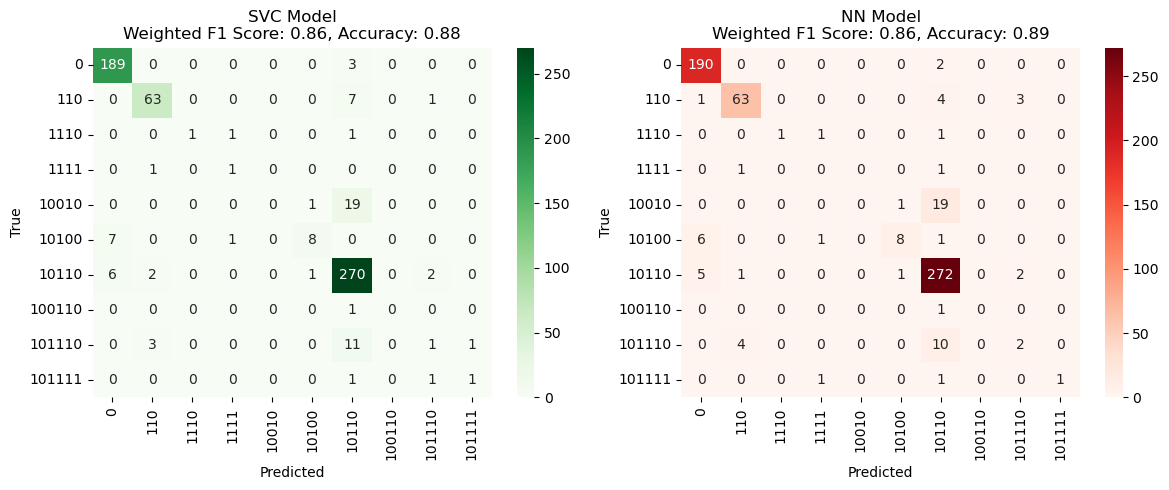

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

# Assuming you have ground truth labels and predicted labels for each model
true_labels = y_test
svc_predicted_labels = svc_predicted_class_names
nn_predicted_labels = nn_predicted_class_names

# Assuming you have the class names in a list called class_names
class_names = svc_classifier.classes_

# Calculate confusion matrix for each model
svc_conf_matrix = confusion_matrix(true_labels, svc_predicted_labels)
nn_conf_matrix = confusion_matrix(true_labels, nn_predicted_labels)

# Calculate weighted F1 scores and accuracy for each model
svc_weighted_f1_score = f1_score(true_labels, svc_predicted_labels, average='weighted')
nn_weighted_f1_score = f1_score(true_labels, nn_predicted_labels, average='weighted')

svc_accuracy = accuracy_score(true_labels, svc_predicted_labels)
nn_accuracy = accuracy_score(true_labels, nn_predicted_labels)

# Plot the confusion matrix for each model
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# For SVC Model heatmap
sns.heatmap(svc_conf_matrix, annot=True, fmt="d", cmap="Greens", ax=axes[0], xticklabels=class_names, yticklabels=class_names)
axes[0].set_title(f"SVC Model\nWeighted F1 Score: {svc_weighted_f1_score:.2f}, Accuracy: {svc_accuracy:.2f}")
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

# For NN Model heatmap
sns.heatmap(nn_conf_matrix, annot=True, fmt="d", cmap="Reds", ax=axes[1], xticklabels=class_names, yticklabels=class_names)
axes[1].set_title(f"NN Model\nWeighted F1 Score: {nn_weighted_f1_score:.2f}, Accuracy: {nn_accuracy:.2f}")
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

plt.tight_layout()
plt.show()

## Reality Simulation

In [26]:
#read the files for future training
filename = 'testing_events.pkl'
file_path = 'C:\\python_intro\\final_project\\'
with open(file_path + filename, 'rb') as file:
    test_ratios = pickle.load(file)
#if the combined ratios is saving as a dataframe

In [27]:
#normalizing the extra columns
cols_to_normalize = test_ratios.columns[-4:]
scaler = MinMaxScaler()
# Normalize the last four columns
test_ratios[cols_to_normalize] = scaler.fit_transform(test_ratios[cols_to_normalize])
# Print the normalized DataFrame
flatten_test = test_ratios.values
graph_test = test_ratios.iloc[:, :50].values

In [38]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import EarlyStopping
#SVC
from sklearn.svm import SVC

NN_all = []
svc_all = []
for i in range(5):
    #NN
    # Define and compile neural network model
    #define the model
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(54,)),
        #keras.layers.Dense(256, activation='relu'),
        #keras.layers.Dense(256, activation='relu'),
        #keras.layers.Dense(128, activation='relu'),
        #keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
        #keras.layers.Dense(1, activation='sigmoid')
    ])
    # Add layers to the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    model.fit(X_train_NN, y_train_NN, validation_data=(X_test_NN, y_test_NN), epochs=100, callbacks=[early_stopping])
    # Use the model obtained at the end of training
    predictions = model.predict(flatten_test)
    NN_all.append(predictions)
    
    #SVC
    svc_classifier = SVC(C = 250, gamma = 'scale', kernel = 'linear',probability=True, random_state=42)
    svc_classifier.fit(X_train, y_train)
    svc_pre = svc_classifier.predict_proba(flatten_test)
    svc_all.append(svc_pre)
    
#get the average values of 5 times of training
NN_average = np.mean(NN_all, axis=0)
svc_average = np.mean(svc_all, axis=0)

Epoch 1/100
75/75 [==============================] - 3s 14ms/step - loss: 1.3906 - accuracy: 0.5894 - val_loss: 0.9067 - val_accuracy: 0.7421
Epoch 2/100
75/75 [==============================] - 1s 12ms/step - loss: 0.7221 - accuracy: 0.8141 - val_loss: 0.6480 - val_accuracy: 0.8298
Epoch 3/100
75/75 [==============================] - 1s 7ms/step - loss: 0.5567 - accuracy: 0.8505 - val_loss: 0.5399 - val_accuracy: 0.8579
Epoch 4/100
75/75 [==============================] - 1s 8ms/step - loss: 0.4902 - accuracy: 0.8563 - val_loss: 0.4967 - val_accuracy: 0.8628
Epoch 5/100
75/75 [==============================] - 1s 10ms/step - loss: 0.4567 - accuracy: 0.8647 - val_loss: 0.4691 - val_accuracy: 0.8661
Epoch 6/100
75/75 [==============================] - 0s 6ms/step - loss: 0.4298 - accuracy: 0.8739 - val_loss: 0.4563 - val_accuracy: 0.8661
Epoch 7/100
75/75 [==============================] - 1s 7ms/step - loss: 0.4118 - accuracy: 0.8759 - val_loss: 0.4569 - val_accuracy: 0.8727
Epoch 8/10

75/75 [==============================] - 0s 6ms/step - loss: 0.2896 - accuracy: 0.9077 - val_loss: 0.3884 - val_accuracy: 0.8793
Epoch 29/100
75/75 [==============================] - 0s 6ms/step - loss: 0.2875 - accuracy: 0.9039 - val_loss: 0.3880 - val_accuracy: 0.8826
Epoch 30/100
75/75 [==============================] - 1s 7ms/step - loss: 0.2831 - accuracy: 0.9089 - val_loss: 0.3916 - val_accuracy: 0.8793
Epoch 31/100
75/75 [==============================] - 0s 6ms/step - loss: 0.2810 - accuracy: 0.9069 - val_loss: 0.3948 - val_accuracy: 0.8860
Epoch 32/100
75/75 [==============================] - 0s 6ms/step - loss: 0.2800 - accuracy: 0.9085 - val_loss: 0.3904 - val_accuracy: 0.8843
Epoch 33/100
75/75 [==============================] - 0s 6ms/step - loss: 0.2766 - accuracy: 0.9123 - val_loss: 0.3790 - val_accuracy: 0.8810
Epoch 34/100
75/75 [==============================] - 0s 7ms/step - loss: 0.2752 - accuracy: 0.9123 - val_loss: 0.3903 - val_accuracy: 0.8793
Epoch 35/100
75/75 

75/75 [==============================] - 0s 7ms/step - loss: 0.5478 - accuracy: 0.8467 - val_loss: 0.5339 - val_accuracy: 0.8562
Epoch 4/100
75/75 [==============================] - 0s 7ms/step - loss: 0.4859 - accuracy: 0.8596 - val_loss: 0.4908 - val_accuracy: 0.8595
Epoch 5/100
75/75 [==============================] - 1s 7ms/step - loss: 0.4528 - accuracy: 0.8655 - val_loss: 0.4829 - val_accuracy: 0.8645
Epoch 6/100
75/75 [==============================] - 1s 7ms/step - loss: 0.4317 - accuracy: 0.8709 - val_loss: 0.4612 - val_accuracy: 0.8661
Epoch 7/100
75/75 [==============================] - 1s 7ms/step - loss: 0.4088 - accuracy: 0.8776 - val_loss: 0.4387 - val_accuracy: 0.8777
Epoch 8/100
75/75 [==============================] - 1s 7ms/step - loss: 0.3962 - accuracy: 0.8772 - val_loss: 0.4813 - val_accuracy: 0.8645
Epoch 9/100
75/75 [==============================] - 0s 7ms/step - loss: 0.3869 - accuracy: 0.8797 - val_loss: 0.4358 - val_accuracy: 0.8744
Epoch 10/100
75/75 [=====

Epoch 61/100
75/75 [==============================] - 0s 7ms/step - loss: 0.2073 - accuracy: 0.9290 - val_loss: 0.3873 - val_accuracy: 0.8926
Epoch 62/100
75/75 [==============================] - 0s 7ms/step - loss: 0.2050 - accuracy: 0.9307 - val_loss: 0.3882 - val_accuracy: 0.8876
Epoch 63/100
1/1 [==============================] - 0s 190ms/step
Epoch 1/100
75/75 [==============================] - 2s 16ms/step - loss: 1.3546 - accuracy: 0.6224 - val_loss: 0.8905 - val_accuracy: 0.7438
Epoch 2/100
75/75 [==============================] - 1s 7ms/step - loss: 0.6933 - accuracy: 0.8246 - val_loss: 0.6141 - val_accuracy: 0.8463
Epoch 3/100
75/75 [==============================] - 0s 7ms/step - loss: 0.5450 - accuracy: 0.8475 - val_loss: 0.5227 - val_accuracy: 0.8562
Epoch 4/100
75/75 [==============================] - 0s 6ms/step - loss: 0.4810 - accuracy: 0.8634 - val_loss: 0.4923 - val_accuracy: 0.8645
Epoch 5/100
75/75 [==============================] - 0s 7ms/step - loss: 0.4495 - acc

75/75 [==============================] - 1s 7ms/step - loss: 0.2265 - accuracy: 0.9265 - val_loss: 0.3895 - val_accuracy: 0.8876
Epoch 51/100
75/75 [==============================] - 0s 7ms/step - loss: 0.2277 - accuracy: 0.9223 - val_loss: 0.3862 - val_accuracy: 0.8843
Epoch 52/100
1/1 [==============================] - 0s 53ms/step


In [39]:
labels = svc_classifier.classes_
all_probabilities = [
    NN_average,
    svc_average
]

results = []  # List to store the results

for probabilities in all_probabilities:
    # Get the top 3 labels with highest probabilities for each event
    top3_labels = np.argsort(-probabilities, axis=1)[:, :3]  # Indices of top 3 labels for each event

    # Retrieve the label names and corresponding probabilities
    top3_labels_names = np.take(labels, top3_labels)  # Retrieve the label names based on indices
    top3_probabilities = np.take_along_axis(probabilities, top3_labels, axis=1)  # Retrieve corresponding probabilities

    # Create a DataFrame to store the results for the current set
    set_results = pd.DataFrame({
        'Event': np.arange(1, len(probabilities) + 1),  # Event numbers
        'Label 1': top3_labels_names[:, 0],
        'Label 2': top3_labels_names[:, 1],
        'Label 3': top3_labels_names[:, 2],
        'Probability 1': top3_probabilities[:, 0],
        'Probability 2': top3_probabilities[:, 1],
        'Probability 3': top3_probabilities[:, 2]
    })

    results.append(set_results)  # Add the results of the current set to the list

# Concatenate all set results into a single DataFrame
all_results = pd.concat(results)

# Print the complete results
all_results

,Event,Label 1,Label 2,Label 3,Probability 1,Probability 2,Probability 3
0,1,10110,10010,101110,0.970001,0.029478,0.000429
1,2,0,10100,10110,0.997432,0.001447,0.001110
2,3,10110,101110,10010,0.966018,0.017814,0.014119
3,4,0,10110,10100,0.993978,0.003721,0.002258
4,5,0,10100,10110,0.989846,0.009935,0.000182
5,6,10110,10010,101110,0.979278,0.020639,0.000070
6,7,10110,101110,110,0.821198,0.130016,0.028773
7,8,10110,101110,10010,0.951426,0.034648,0.013415
8,9,0,110,1110,0.983575,0.010944,0.002154
9,10,10110,101110,10010,0.987477,0.007870,0.004299


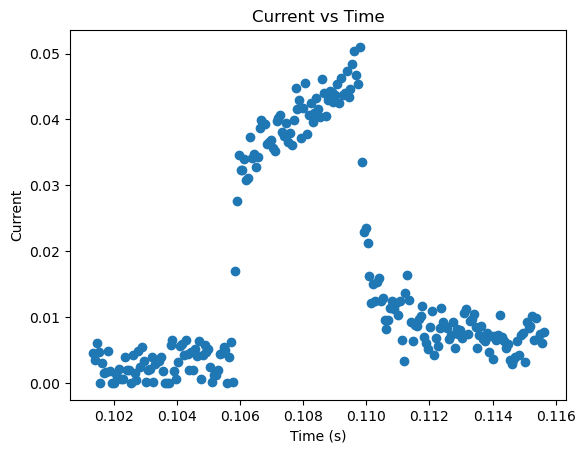

Event               21.000000
Label 1              0.000000
Label 2          10100.000000
Label 3          10110.000000
Probability 1        0.990622
Probability 2        0.006219
Probability 3        0.002757
Name: 20, dtype: float64 Event               21.000000
Label 1              0.000000
Label 2          10100.000000
Label 3          10110.000000
Probability 1        0.977804
Probability 2        0.010350
Probability 3        0.009499
Name: 20, dtype: float64


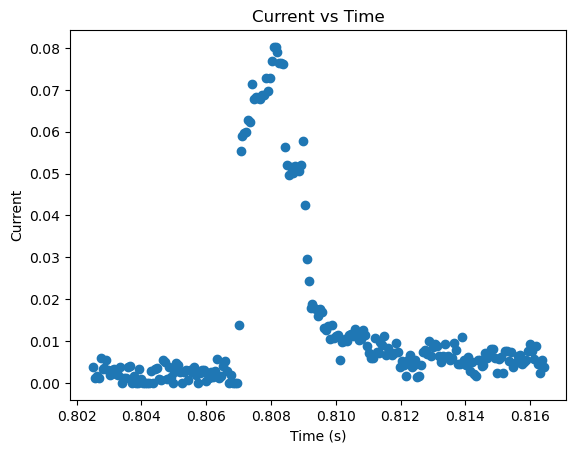

Event                22.000000
Label 1             110.000000
Label 2          101110.000000
Label 3           10110.000000
Probability 1         0.897734
Probability 2         0.060071
Probability 3         0.030313
Name: 21, dtype: float64 Event                22.000000
Label 1             110.000000
Label 2           10110.000000
Label 3          101110.000000
Probability 1         0.677691
Probability 2         0.222686
Probability 3         0.078531
Name: 21, dtype: float64


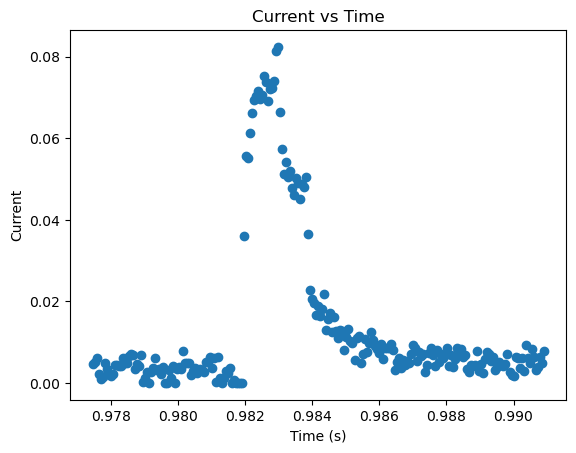

Event                23.000000
Label 1           10110.000000
Label 2             110.000000
Label 3          101110.000000
Probability 1         0.560136
Probability 2         0.262719
Probability 3         0.130675
Name: 22, dtype: float64 Event                23.000000
Label 1             110.000000
Label 2           10110.000000
Label 3          101110.000000
Probability 1         0.471170
Probability 2         0.449372
Probability 3         0.036855
Name: 22, dtype: float64


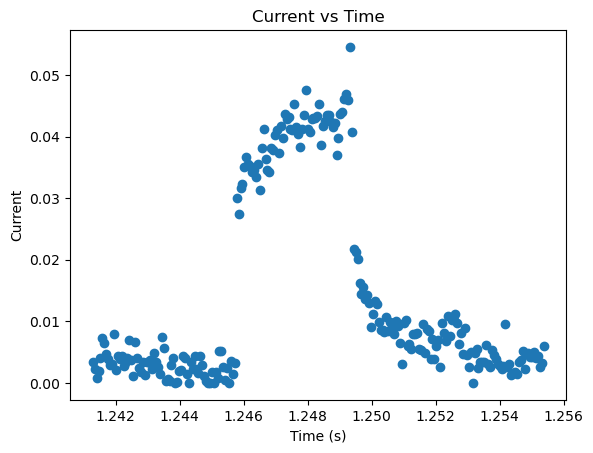

Event               24.000000
Label 1              0.000000
Label 2          10100.000000
Label 3          10110.000000
Probability 1        0.939160
Probability 2        0.048797
Probability 3        0.009993
Name: 23, dtype: float64 Event               24.000000
Label 1              0.000000
Label 2          10100.000000
Label 3          10110.000000
Probability 1        0.906873
Probability 2        0.075977
Probability 3        0.009405
Name: 23, dtype: float64


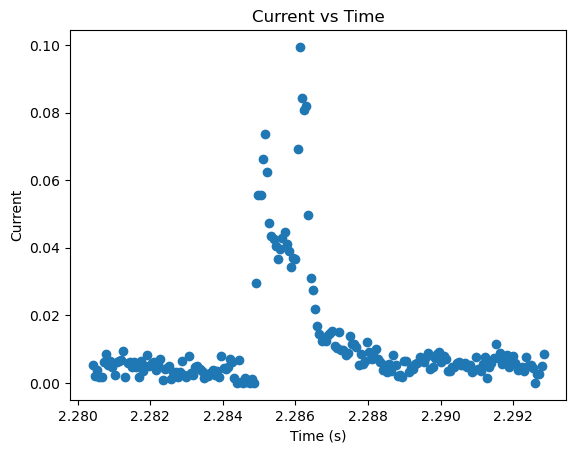

Event               25.000000
Label 1          10110.000000
Label 2          10010.000000
Label 3            110.000000
Probability 1        0.367465
Probability 2        0.183479
Probability 3        0.156348
Name: 24, dtype: float64 Event                25.000000
Label 1           10110.000000
Label 2           10100.000000
Label 3          101110.000000
Probability 1         0.511434
Probability 2         0.194837
Probability 3         0.083210
Name: 24, dtype: float64


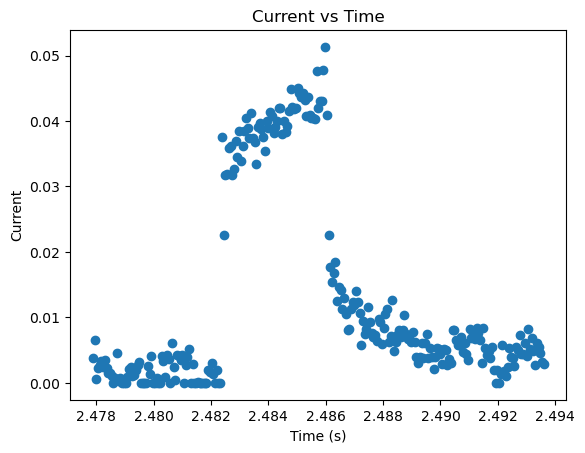

Event               26.000000
Label 1              0.000000
Label 2          10100.000000
Label 3          10110.000000
Probability 1        0.961252
Probability 2        0.031652
Probability 3        0.005690
Name: 25, dtype: float64 Event               26.000000
Label 1              0.000000
Label 2          10100.000000
Label 3          10010.000000
Probability 1        0.945933
Probability 2        0.041778
Probability 3        0.006832
Name: 25, dtype: float64


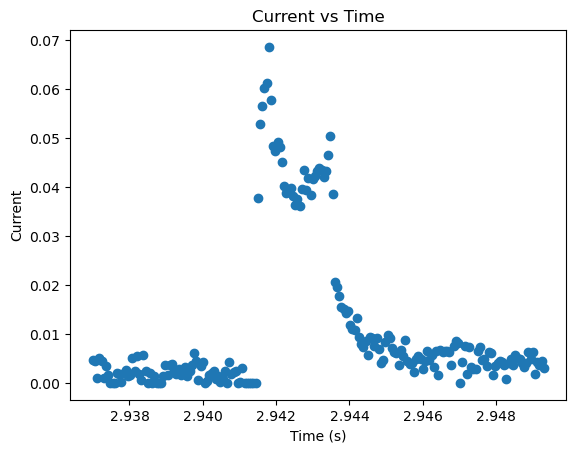

Event                27.000000
Label 1           10110.000000
Label 2           10010.000000
Label 3          101110.000000
Probability 1         0.927810
Probability 2         0.071438
Probability 3         0.000643
Name: 26, dtype: float64 Event                27.000000
Label 1           10110.000000
Label 2           10010.000000
Label 3          101110.000000
Probability 1         0.924641
Probability 2         0.064528
Probability 3         0.004674
Name: 26, dtype: float64


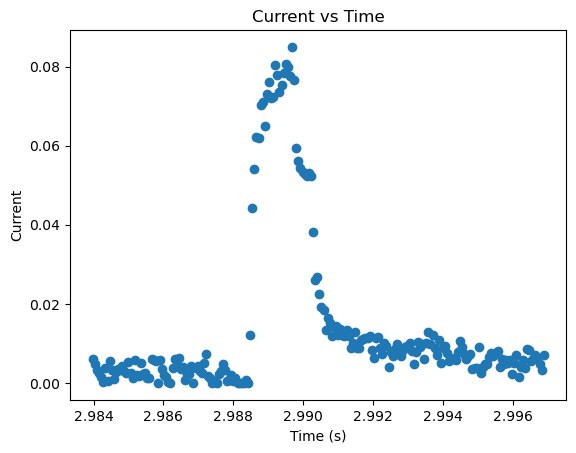

Event                28.000000
Label 1             110.000000
Label 2          101110.000000
Label 3           10110.000000
Probability 1         0.964027
Probability 2         0.025467
Probability 3         0.007031
Name: 27, dtype: float64 Event                28.000000
Label 1             110.000000
Label 2           10110.000000
Label 3          101110.000000
Probability 1         0.881649
Probability 2         0.070255
Probability 3         0.037116
Name: 27, dtype: float64


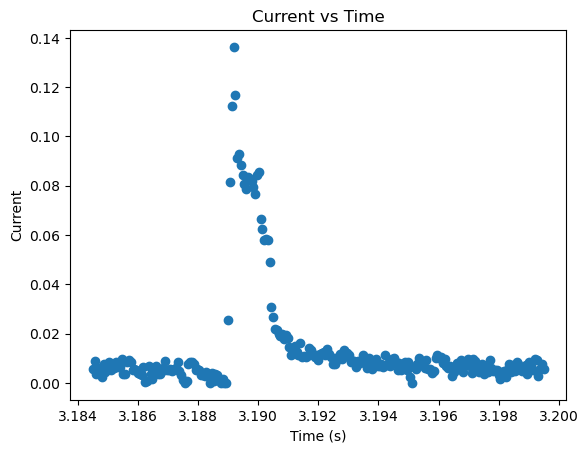

Event                29.000000
Label 1          101111.000000
Label 2          101110.000000
Label 3            1111.000000
Probability 1         0.581702
Probability 2         0.194452
Probability 3         0.173317
Name: 28, dtype: float64 Event                29.000000
Label 1          101111.000000
Label 2            1111.000000
Label 3          101110.000000
Probability 1         0.637298
Probability 2         0.154959
Probability 3         0.122088
Name: 28, dtype: float64


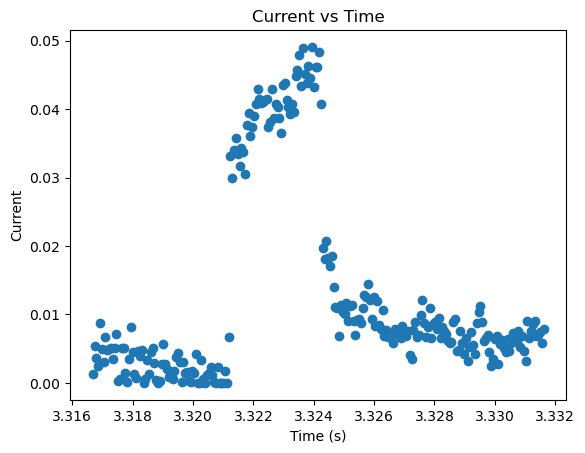

Event               30.000000
Label 1              0.000000
Label 2          10100.000000
Label 3          10110.000000
Probability 1        0.999739
Probability 2        0.000241
Probability 3        0.000008
Name: 29, dtype: float64 Event               30.000000
Label 1              0.000000
Label 2            110.000000
Label 3          10100.000000
Probability 1        0.997771
Probability 2        0.000764
Probability 3        0.000609
Name: 29, dtype: float64


In [45]:
#load the testing dataset
# Load the .mat file
mat_file = scipy.io.loadmat('C:\\python_intro\\final_project\\matfiles\\test_files\\events_test3.mat')
peak_file = scipy.io.loadmat('C:\\python_intro\\final_project\\matfiles\\test_files\\pkmax_test3.mat')
width_file = scipy.io.loadmat('C:\\python_intro\\final_project\\matfiles\\test_files\\width_test3.mat')
area_file = scipy.io.loadmat('C:\\python_intro\\final_project\\matfiles\\test_files\\area_test3.mat')

for i in range(len(mat_file["Event"][0])):
    # Access the data in the .mat file
    env_time = ((mat_file["Event"][0][i][0][0][2]).T)[0]
    env_current = ((mat_file["Event"][0][i][0][0][1]).T)[0]

    # Create a plot
    plt.scatter(env_time,env_current)
    plt.xlabel('Time (s)')
    plt.ylabel('Current')
    plt.title('Current vs Time')

    # Show the plot
    plt.show()
    print(all_results.iloc[i+20], all_results.iloc[i+50])